In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model

In [2]:
data= pd.read_csv('predictive_maintenance.csv')

print(data.keys())


# Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
#        'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
#        'Tool wear [min]', 'Target', 'Failure Type'],
#       dtype='object')

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')


In [3]:
print(data)

        UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0    

In [4]:
print(data.describe())

               UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


# Train Test Splitting

In [6]:
# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     print(shuffled)
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [7]:
# train_set, test_set = split_train_test(data, 0.2)

In [8]:
# print(f"Rows in train set: {len(train_set)}\nRows in Test set: {len(test_set)}")

In [9]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42) 

print(f"Rows in train set: {len(train_set)}\nRows in Test set: {len(test_set)}")

Rows in train set: 8000
Rows in Test set: 2000


In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['Target']):
    strat_train_set=data.loc[train_index]
    strat_test_set=data.loc[test_index]

In [11]:
strat_test_set

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
2997,2998,L50177,L,300.5,309.8,1345,62.7,153,0,No Failure
4871,4872,L52051,L,303.7,312.4,1513,40.1,135,0,No Failure
3858,3859,L51038,L,302.5,311.4,1559,37.6,209,0,No Failure
951,952,H30365,H,295.6,306.3,1509,35.8,60,0,No Failure
6463,6464,H35877,H,300.5,310.0,1358,60.4,102,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
1686,1687,H31100,H,297.9,307.3,1663,28.7,7,0,No Failure
6952,6953,L54132,L,300.8,311.3,1498,40.2,73,0,No Failure
9954,9955,M24814,M,298.1,307.9,1446,42.8,121,0,No Failure
5728,5729,M20588,M,302.4,311.9,1422,46.4,194,0,No Failure


In [12]:
strat_test_set['Target'].value_counts()

0    1932
1      68
Name: Target, dtype: int64

In [13]:
data['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [14]:
strat_train_set['Target'].value_counts() 
# This show that using statified split helped us to split the data evenly considering the most important feature..

0    7729
1     271
Name: Target, dtype: int64

## Looking for Correlations

In [15]:
corr_matrix = data.corr()

In [16]:
corr_matrix['Target'].sort_values(ascending=False)

Target                     1.000000
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Process temperature [K]    0.035946
UDI                       -0.022892
Rotational speed [rpm]    -0.044188
Name: Target, dtype: float64

array([[<AxesSubplot:xlabel='Target', ylabel='Target'>,
        <AxesSubplot:xlabel='Air temperature [K]', ylabel='Target'>,
        <AxesSubplot:xlabel='Process temperature [K]', ylabel='Target'>,
        <AxesSubplot:xlabel='Torque [Nm]', ylabel='Target'>,
        <AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Target'>,
        <AxesSubplot:xlabel='Tool wear [min]', ylabel='Target'>],
       [<AxesSubplot:xlabel='Target', ylabel='Air temperature [K]'>,
        <AxesSubplot:xlabel='Air temperature [K]', ylabel='Air temperature [K]'>,
        <AxesSubplot:xlabel='Process temperature [K]', ylabel='Air temperature [K]'>,
        <AxesSubplot:xlabel='Torque [Nm]', ylabel='Air temperature [K]'>,
        <AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Air temperature [K]'>,
        <AxesSubplot:xlabel='Tool wear [min]', ylabel='Air temperature [K]'>],
       [<AxesSubplot:xlabel='Target', ylabel='Process temperature [K]'>,
        <AxesSubplot:xlabel='Air temperature [K]', ylab

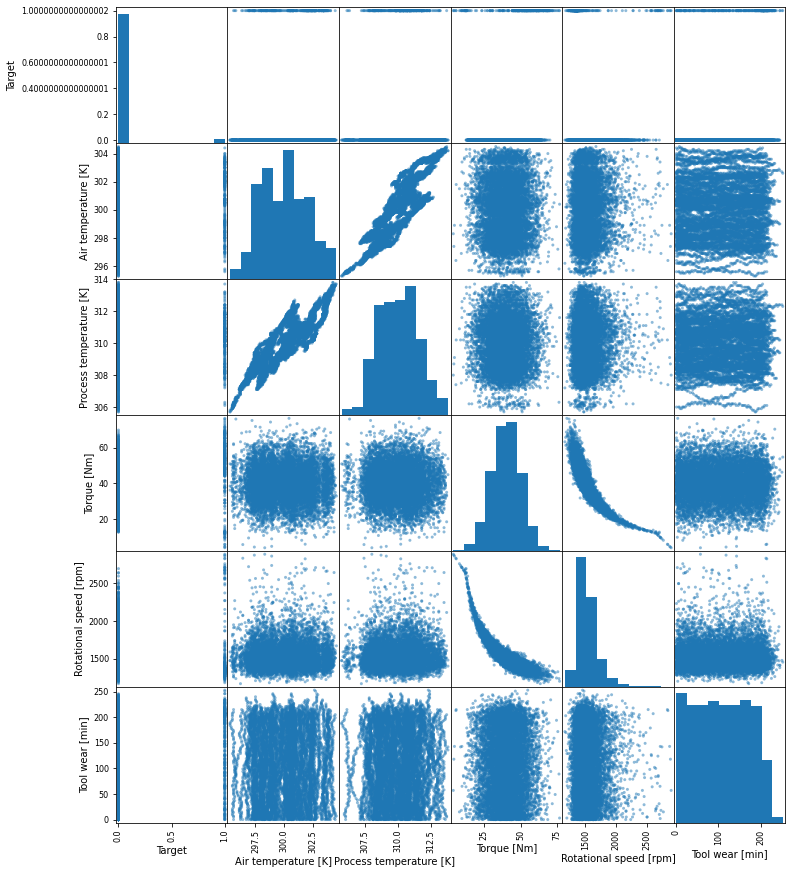

In [23]:
from pandas.plotting import scatter_matrix
attributes = ["Target", "Air temperature [K]", "Process temperature [K]", "Torque [Nm]", "Rotational speed [rpm]", "Tool wear [min]"]
scatter_matrix(data[attributes], figsize = (12,15)) 

## Creating a Pipeline

In [18]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# my_pipeline = ([
#     ('std_scaler', StandardScaler()),
# ])

In [19]:
# data_num_tr = my_pipeline.fit_transform(data)

In [20]:
# data = strat_train_set.drop("Target", axis=1)
# data_labels = strat_train_set["Target"].copy()

## Selecting a desired Model

In [21]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(data, data_labels)

In [22]:
class Modelling:
    def __init__(self, X_train, Y_train, X_test, Y_test, models):
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test
        self.models = models
    
    def fit(self):
        model_acc = []
        model_time= []
       
        for i in self.models:
            start=time.time()
            if i == 'knn':
                accuracy = []
                for j in range(1,200):    
                    kn = KNeighborsClassifier(n_neighbors=j)
                    kn.fit(self.X_train,self.Y_train)
                    predK = kn.predict(self.X_test)
                    accuracy.append([accuracy_score(self.Y_test,predK),j])
                temp = accuracy[0]
                for m in accuracy:
                    if temp[0] < m[0]:
                        temp=m
                i = KNeighborsClassifier(n_neighbors=temp[1])
            i.fit(self.X_train,self.Y_train)
            model_acc.append(accuracy_score(self.Y_test,i.predict(self.X_test)))
            stop=time.time()
            model_time.append((stop-start))
            print(i,'has been fit')
        self.models_output = pd.DataFrame({'Models':self.models,'Accuracy':model_acc,'Runtime (s)':model_time})
        
    def results(self):
        models=self.models_output
        models = models.sort_values(by=['Accuracy','Runtime (s)'],ascending=[False,True]).reset_index().drop('index',axis=1)
        self.best = models['Models'][0]
        models['Models']=models['Models'].astype(str).str.split("(", n = 2, expand = True)[0]
        models['Accuracy']=models['Accuracy'].round(5)*100
        self.models_output_cleaned=models
        return(models)
        
    def best_model(self,type):
        if type=='model':
            return(self.best)
        elif type=='name':
            return(self.models_output_cleaned['Models'][0])
    
    def best_model_accuracy(self):
        return(self.models_output_cleaned['Accuracy'][0])
    
    def best_model_runtime(self):
        return(round(self.models_output_cleaned['Runtime (s)'][0],3))
    
    def best_model_predict(self,X_test):
        return(self.best.predict(X_test))
    
    def best_model_clmatrix(self):
        return(classification_report(self.Y_test,self.best.predict(self.X_test)))